In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math 
from scipy import stats as ss
import datetime as dt

In [2]:
df_pre = pd.read_csv('marketing_campaign.csv',delimiter=';')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_pre.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


# Preprocess

In [3]:
# Remove ID column
df = df_pre.iloc[:,1:]

In [4]:
# Change Year_Birth to age
df['Age'] = 2021 - df['Year_Birth']

In [5]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40


In [6]:
# Change Dt_Customer to Num_days_cust
# Get todays date
df['DateTimeToday'] = dt.datetime.today()

# convert date string to DateTime format
df['DateTimeConvert'] = pd.to_datetime(df['Dt_Customer'],format='%Y-%m-%d')

# Get difference in days
df['DateTimeDifference'] = df['DateTimeToday'] - df['DateTimeConvert']

# Initialize difference in int column
df['DaysCustomer'] = 0

# Convert days difference to int
for x in range(len(df)):
    df.at[x, 'DaysCustomer'] = df['DateTimeDifference'][x].days


In [7]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Year_Birth           2240 non-null   int64          
 1   Education            2240 non-null   object         
 2   Marital_Status       2240 non-null   object         
 3   Income               2216 non-null   float64        
 4   Kidhome              2240 non-null   int64          
 5   Teenhome             2240 non-null   int64          
 6   Dt_Customer          2240 non-null   object         
 7   Recency              2240 non-null   int64          
 8   MntWines             2240 non-null   int64          
 9   MntFruits            2240 non-null   int64          
 10  MntMeatProducts      2240 non-null   int64          
 11  MntFishProducts      2240 non-null   int64          
 12  MntSweetProducts     2240 non-null   int64          
 13  MntGoldProds      

In [8]:
# There are missing values in the Income column, 2240-2216=24.
# Remove them due to low count for now.
# Could rerun model to see difference.

In [9]:
# drop nan values
df = df.dropna()

In [10]:
# Check for duplicated rows
dup_df = df.duplicated()
dup_df.sum()

182

In [11]:
# Compare to before removing ID column
df_with_id = df_pre
df_with_id.duplicated().sum()

0

It seems that there are 182 duplicates. If duplicate function where to run before removing the "ID" column then there would be no duplicates.  

In [12]:
# Drop duplicates
df = df.drop_duplicates()
len(df)

2034

In [13]:
print('Duplicate rows dropped :', len(df_pre)-len(df))

Duplicate rows dropped : 206


In [14]:
df.isna().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Age                    0
DateTimeToday          0
DateTimeConvert        0
DateTimeDifference     0
DaysCustomer           0
dtype: int64

In [15]:
# reset index
df = df.reset_index(drop=True)

# EDA

### Target Column

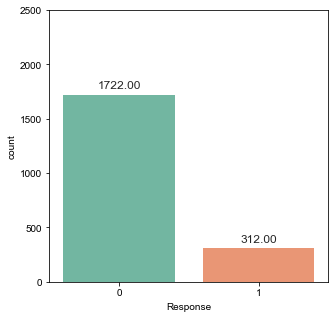

In [16]:
# Target Column

#plot initialize
fig, ax1 = plt.subplots(figsize=(5,5))

#countplot
plot = sns.countplot(x = 'Response', data = df, palette='Set2')

#settings
sns.set(style = 'darkgrid')
plot.set(ylim=(0, 2500))

# annotate bar plots
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

### Plot categorical columns

C:\Users\dhuan\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """
C:\Users\dhuan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


<AxesSubplot:xlabel='Teenhome', ylabel='count'>

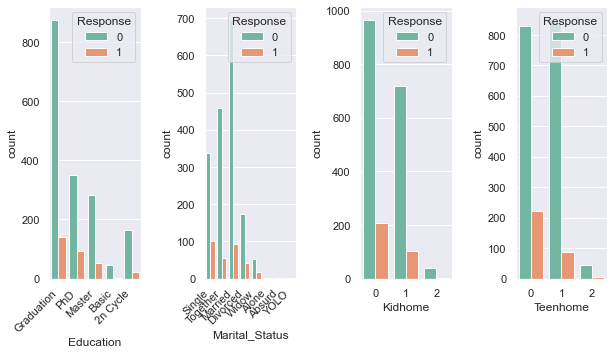

In [17]:
#plot settings
sns.set(style = 'darkgrid')
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(10,5))
fig.subplots_adjust(hspace=0.4, wspace=0.7)
ax1.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
ax2.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')

#countplots
sns.countplot(x = 'Education', hue ='Response', data = df, ax = ax1, palette = 'Set2')
sns.countplot(x = 'Marital_Status', hue = 'Response', data = df, ax = ax2, palette = 'Set2')
sns.countplot(x = 'Kidhome', hue = 'Response', data = df, ax = ax3, palette = 'Set2')
sns.countplot(x = 'Teenhome', hue = 'Response', data = df, ax = ax4, palette = 'Set2')


### Plot Numerical Columns

<AxesSubplot:xlabel='Response', ylabel='MntSweetProducts'>

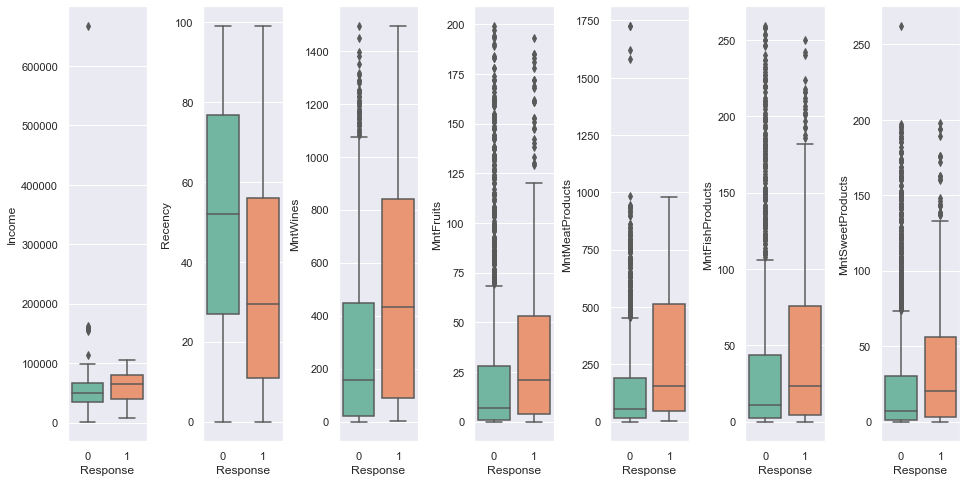

In [18]:
#plot settings
sns.set(style = 'darkgrid')
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1,7,figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

#boxplots
sns.boxplot(x = 'Response', y ='Income', data = df, ax = ax1, palette = 'Set2')
sns.boxplot(x = 'Response', y ='Recency', data = df, ax = ax2, palette = 'Set2')
sns.boxplot(x = 'Response', y ='MntWines', data = df, ax = ax3, palette = 'Set2')
sns.boxplot(x = 'Response', y ='MntFruits', data = df, ax = ax4, palette = 'Set2')
sns.boxplot(x = 'Response', y ='MntMeatProducts', data = df, ax = ax5, palette = 'Set2')
sns.boxplot(x = 'Response', y ='MntFishProducts', data = df, ax = ax6, palette = 'Set2')
sns.boxplot(x = 'Response', y ='MntSweetProducts', data = df, ax = ax7, palette = 'Set2')

In [19]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,DateTimeToday,DateTimeConvert,DateTimeDifference,DaysCustomer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,2021-04-27 13:50:30.797546,2012-09-04,3157 days 13:50:30.797546,3157
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2021-04-27 13:50:30.797546,2014-03-08,2607 days 13:50:30.797546,2607
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,2021-04-27 13:50:30.797546,2013-08-21,2806 days 13:50:30.797546,2806
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,2021-04-27 13:50:30.797546,2014-02-10,2633 days 13:50:30.797546,2633
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2021-04-27 13:50:30.797546,2014-01-19,2655 days 13:50:30.797546,2655


<AxesSubplot:xlabel='Response', ylabel='NumWebVisitsMonth'>

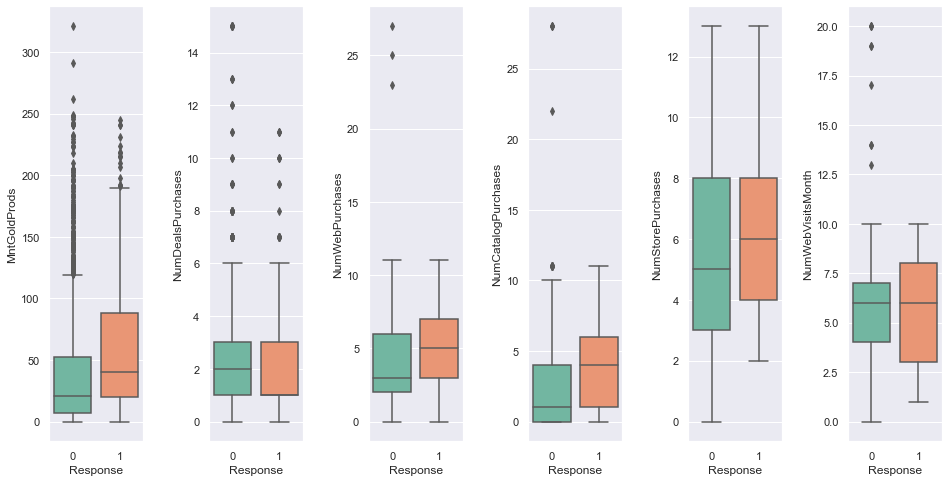

In [20]:
#plot settings
sns.set(style = 'darkgrid')
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6,figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

#boxplots
sns.boxplot(x = 'Response', y ='MntGoldProds', data = df, ax = ax1, palette = 'Set2')
sns.boxplot(x = 'Response', y ='NumDealsPurchases', data = df, ax = ax2, palette = 'Set2')
sns.boxplot(x = 'Response', y ='NumWebPurchases', data = df, ax = ax3, palette = 'Set2')
sns.boxplot(x = 'Response', y ='NumCatalogPurchases', data = df, ax = ax4, palette = 'Set2')
sns.boxplot(x = 'Response', y ='NumStorePurchases', data = df, ax = ax5, palette = 'Set2')
sns.boxplot(x = 'Response', y ='NumWebVisitsMonth', data = df, ax = ax6, palette = 'Set2')


<AxesSubplot:xlabel='Response', ylabel='Z_Revenue'>

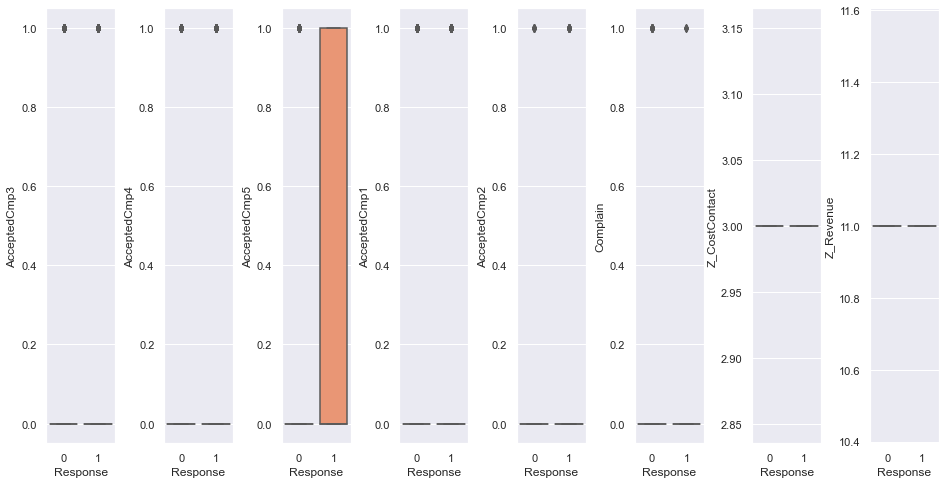

In [21]:
#plot settings
sns.set(style = 'darkgrid')
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1,8,figsize=(16,8))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

#boxplots
sns.boxplot(x = 'Response', y ='AcceptedCmp3', data = df, ax = ax1, palette = 'Set2')
sns.boxplot(x = 'Response', y ='AcceptedCmp4', data = df, ax = ax2, palette = 'Set2')
sns.boxplot(x = 'Response', y ='AcceptedCmp5', data = df, ax = ax3, palette = 'Set2')
sns.boxplot(x = 'Response', y ='AcceptedCmp1', data = df, ax = ax4, palette = 'Set2')
sns.boxplot(x = 'Response', y ='AcceptedCmp2', data = df, ax = ax5, palette = 'Set2')
sns.boxplot(x = 'Response', y ='Complain', data = df, ax = ax6, palette = 'Set2')
sns.boxplot(x = 'Response', y ='Z_CostContact', data = df, ax = ax7, palette = 'Set2')
sns.boxplot(x = 'Response', y ='Z_Revenue', data = df, ax = ax8, palette = 'Set2')


In [22]:
df['AcceptedCmp3'].value_counts()

0    1883
1     151
Name: AcceptedCmp3, dtype: int64

In [23]:
df['AcceptedCmp4'].value_counts()

0    1879
1     155
Name: AcceptedCmp4, dtype: int64

In [24]:
df['AcceptedCmp5'].value_counts()

0    1887
1     147
Name: AcceptedCmp5, dtype: int64

In [25]:
df['AcceptedCmp1'].value_counts()

0    1901
1     133
Name: AcceptedCmp1, dtype: int64

In [26]:
df['AcceptedCmp2'].value_counts()

0    2008
1      26
Name: AcceptedCmp2, dtype: int64

In [27]:
df['Complain'].value_counts()

0    2014
1      20
Name: Complain, dtype: int64

In [28]:
df['Z_CostContact'].value_counts()
# Remove this column

3    2034
Name: Z_CostContact, dtype: int64

In [29]:
df['Z_Revenue'].value_counts()
# Remove this column

11    2034
Name: Z_Revenue, dtype: int64

### Correlation

In [30]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'DateTimeToday', 'DateTimeConvert', 'DateTimeDifference',
       'DaysCustomer'],
      dtype='object')

In [31]:
#specify the numerical variables
df_num = df[['Year_Birth', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age',
       'DaysCustomer']]

[Text(0, 0.5, 'Year_Birth'),
 Text(0, 1.5, 'Income'),
 Text(0, 2.5, 'Recency'),
 Text(0, 3.5, 'MntWines'),
 Text(0, 4.5, 'MntFruits'),
 Text(0, 5.5, 'MntMeatProducts'),
 Text(0, 6.5, 'MntFishProducts'),
 Text(0, 7.5, 'MntSweetProducts'),
 Text(0, 8.5, 'MntGoldProds'),
 Text(0, 9.5, 'NumDealsPurchases'),
 Text(0, 10.5, 'NumWebPurchases'),
 Text(0, 11.5, 'NumCatalogPurchases'),
 Text(0, 12.5, 'NumStorePurchases'),
 Text(0, 13.5, 'NumWebVisitsMonth'),
 Text(0, 14.5, 'AcceptedCmp3'),
 Text(0, 15.5, 'AcceptedCmp4'),
 Text(0, 16.5, 'AcceptedCmp5'),
 Text(0, 17.5, 'AcceptedCmp1'),
 Text(0, 18.5, 'AcceptedCmp2'),
 Text(0, 19.5, 'Complain'),
 Text(0, 20.5, 'Z_CostContact'),
 Text(0, 21.5, 'Z_Revenue'),
 Text(0, 22.5, 'Response'),
 Text(0, 23.5, 'Age'),
 Text(0, 24.5, 'DaysCustomer')]

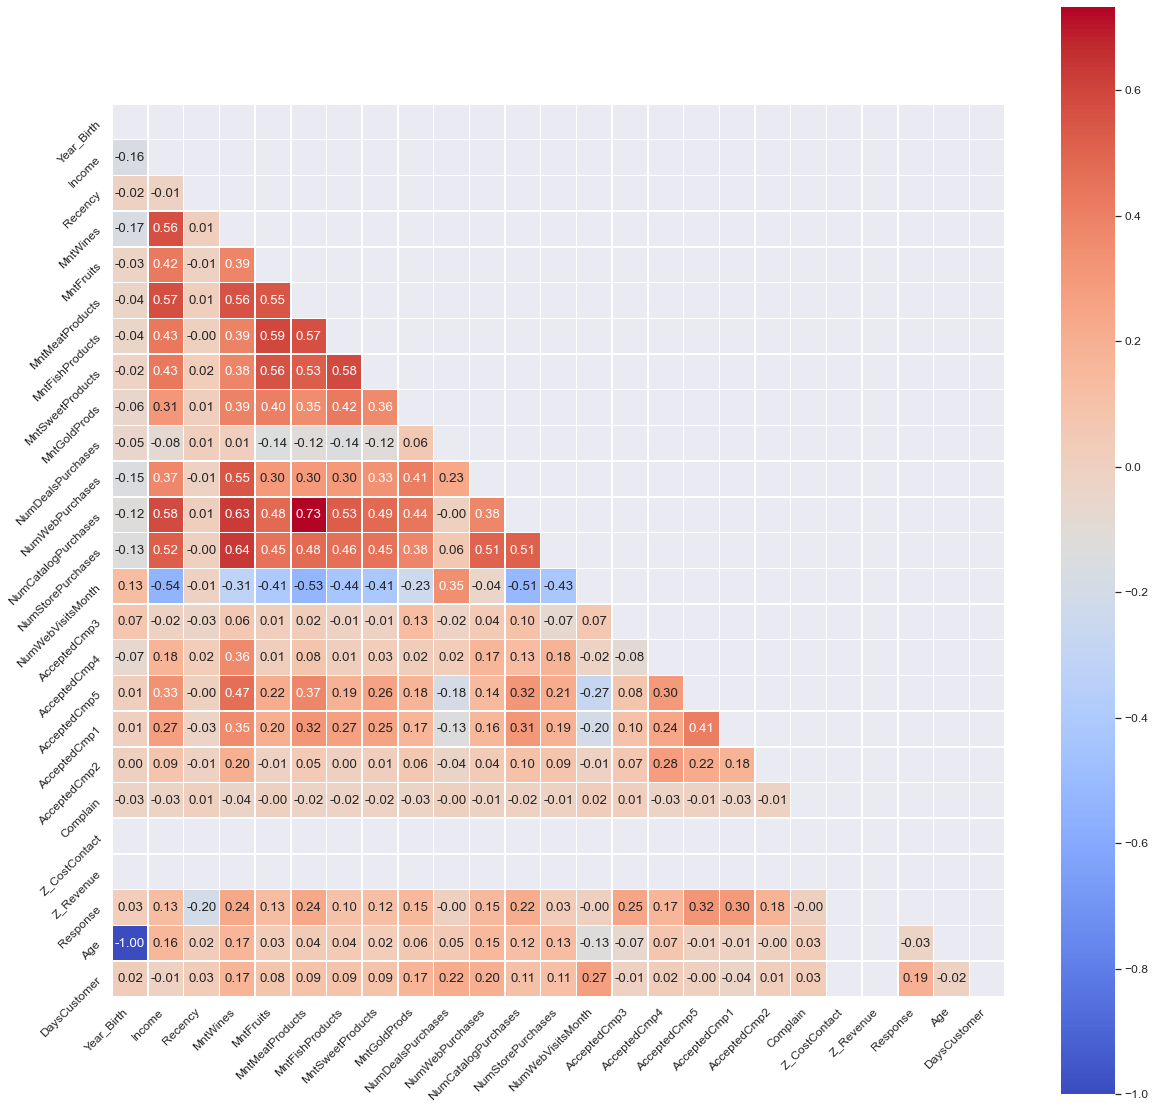

In [32]:
#add a mask to hide identical pairwise correlations
mask = np.zeros_like(df_num.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#plot settings
sns.set(font_scale=1.1)
plt.figure(figsize = (20,20))

#correlation matrix
corrMatrix = df_num.corr()
g = sns.heatmap(corrMatrix, vmin = -1,cmap='coolwarm', fmt='.2f', annot = True,
                square = True, linewidths = .5,mask = mask)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), rotation=45, horizontalalignment='right')

In [33]:
#specify the categorical variables
df_cramer = df[['Education', 'Marital_Status', 'Kidhome','Teenhome']]

In [34]:
#Cramer's V correlation matrix, used for categorical variables
#https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

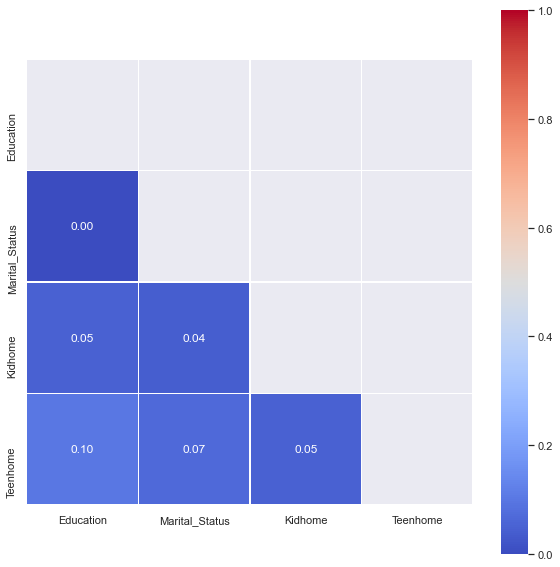

In [35]:
#create the cramers correlation matrix
rows= []

for var1 in df_cramer:
    col = []
    for var2 in df_cramer:
        cramers =cramers_v(df_cramer[var1], df_cramer[var2])
        col.append(round(cramers,2)) 
    rows.append(col)

cramers_results = np.array(rows)
df_cramer_corr = pd.DataFrame(cramers_results, columns = df_cramer.columns, index =df_cramer.columns)

#mask the diagonial and top triangle
mask = np.zeros_like(df_cramer_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#set correlation graph size
sns.set(font_scale=1)
plt.figure(figsize = (10,10))

#correlation graph settings
ax = sns.heatmap(df_cramer_corr, vmin=0., vmax=1,cmap='coolwarm', fmt='.2f', annot = True, square = True,
                 linewidths = .5,mask = mask)
plt.show()

# Data Preparation for Model Baseline Model

In [36]:
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,DateTimeToday,DateTimeConvert,DateTimeDifference,DaysCustomer
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,2021-04-27 13:50:30.797546,2012-09-04,3157 days 13:50:30.797546,3157
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,2021-04-27 13:50:30.797546,2014-03-08,2607 days 13:50:30.797546,2607
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,56,2021-04-27 13:50:30.797546,2013-08-21,2806 days 13:50:30.797546,2806
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,37,2021-04-27 13:50:30.797546,2014-02-10,2633 days 13:50:30.797546,2633
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,40,2021-04-27 13:50:30.797546,2014-01-19,2655 days 13:50:30.797546,2655


In [37]:
# Remove columns
df_model = df[[ 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response','Age','DaysCustomer']]

In [38]:
df_model.head(5)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,DaysCustomer
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3157
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2607
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2806
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2633
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2655


In [39]:
# dummy code
df_model1 = pd.get_dummies(df_model, columns=['Education', 'Marital_Status'], prefix_sep='_', drop_first=True)
df_model1.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,DaysCustomer,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,64,3157,0,1,0,0,0,0,0,1,0,0,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,67,2607,0,1,0,0,0,0,0,1,0,0,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,56,2806,0,1,0,0,0,0,0,0,1,0,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,37,2633,0,1,0,0,0,0,0,0,1,0,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,40,2655,0,0,0,1,0,0,1,0,0,0,0


In [40]:
df_model1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'DaysCustomer',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO'],
      dtype='object')

In [41]:
# df for attributes
X = df_model1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'DaysCustomer',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']]

# df for target column
y = df_model1['Response']

In [42]:
df_model1.shape

(2034, 35)

# Baseline Model

In [43]:
# Import all models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# List all the models to be fitted
models_store = [LogisticRegression(random_state=0, max_iter=3000),
                SVC(gamma='auto'),
                SGDClassifier(max_iter=1000, tol=1e-3),
                KNeighborsClassifier(n_neighbors=3),
                DecisionTreeClassifier(random_state=0),
                MLPClassifier(random_state=1, max_iter=300),
                GaussianNB()]

# String values of the models
models_names = ['LogisticRegression', 
                'SVC', 
                'SGD', 
                'KNNClassifer', 
                'DecisionTree', 
                'MLPClassifer',
                'GaussianNB']

In [44]:
from sklearn.model_selection import cross_validate

#empty array to hold peformance of all model
acc_storage = []
prec_storage = []
recall_storage = []
f1_storage = []

#loop through all models and run each one according to the pipeline steps
for model in models_store:
    
    #performance metrics
    scores = cross_validate(model, X, y, cv = 4, scoring = ('accuracy', 'precision', 'recall', 'f1'))
    acc_avg_score = scores['test_accuracy'].mean()
    prec_avg_score = scores['test_precision'].mean()
    recall_avg_score = scores['test_recall'].mean()
    f1_avg_score = scores['test_f1'].mean()

    
    acc_performance = str(round(acc_avg_score,5)) + ' +/- ' + str(round((scores['test_accuracy'].max()-acc_avg_score),5))
    prec_performance = str(round(prec_avg_score,5)) + ' +/- ' + str(round((scores['test_precision'].max()-prec_avg_score),5))
    recall_performance = str(round(recall_avg_score,5)) + ' +/- ' + str(round((scores['test_recall'].max()-recall_avg_score),5))
    f1_performance = str(round(f1_avg_score,5)) + ' +/- ' + str(round((scores['test_f1'].max()-f1_avg_score),5))

    acc_storage.append(acc_performance)
    prec_storage.append(prec_performance)
    recall_storage.append(recall_performance)
    f1_storage.append(f1_performance)

#display performance 
df_metric = pd.DataFrame(data = {'Models' : models_names, 
                                 'accuracy' : acc_storage,
                                 'precision' : prec_storage,
                                 'recall' : recall_storage,
                                 'f1': f1_storage})

df_metric.sort_values(by = 'accuracy', ascending = False)



C:\Users\dhuan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhuan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dhuan\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\dhuan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due 

,Models,accuracy,precision,recall,f1
0,LogisticRegression,0.8535 +/- 0.00871,0.56744 +/- 0.08641,0.22756 +/- 0.06731,0.32046 +/- 0.06937
1,SVC,0.84022 +/- 0.00261,0.09167 +/- 0.10833,0.00641 +/- 0.00641,0.01198 +/- 0.01212
3,KNNClassifer,0.82104 +/- 0.01393,0.32298 +/- 0.08327,0.15064 +/- 0.01603,0.20473 +/- 0.03163
4,DecisionTree,0.82055 +/- 0.02228,0.41528 +/- 0.06859,0.38462 +/- 0.01282,0.39795 +/- 0.03062
6,GaussianNB,0.77583 +/- 0.01945,0.34628 +/- 0.02346,0.51282 +/- 0.05128,0.41249 +/- 0.03421
5,MLPClassifer,0.68994 +/- 0.18014,0.21058 +/- 0.47692,0.30769 +/- 0.64103,0.16655 +/- 0.23345
2,SGD,0.67308 +/- 0.17368,0.09465 +/- 0.10066,0.34295 +/- 0.38782,0.14812 +/- 0.15129


# Feature Engineering

### Scale data

In [45]:
from sklearn import preprocessing

# Specify columns, exclude categorical and target variable
df_numerical = df_model1[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Age', 'DaysCustomer']]

# Column names
names = df_numerical.columns

# Initialize scaler
scaler = preprocessing.StandardScaler()

# Fit data
scaled_num_df = scaler.fit_transform(df_numerical)
scaled_num_df = pd.DataFrame(scaled_num_df, columns=names)

In [52]:
# add back in categorical and target variables

df_add = df_model1[['Kidhome', 'Teenhome','Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO','Response']]

df_scaled = pd.concat([scaled_num_df, df_add], axis=1)

### Cluster dataset

In [53]:
# add clustering column
# remove target label
df_for_cluster = df_scaled.iloc[:,:-1]

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 393, cost: 31590.0
Run 1, iteration: 2/100, moves: 150, cost: 31589.0
Run 1, iteration: 3/100, moves: 0, cost: 31589.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 459, cost: 31156.0
Run 1, iteration: 2/100, moves: 76, cost: 31156.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 394, cost: 30851.0
Run 1, iteration: 2/100, moves: 38, cost: 30851.0


C:\Users\dhuan\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\dhuan\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


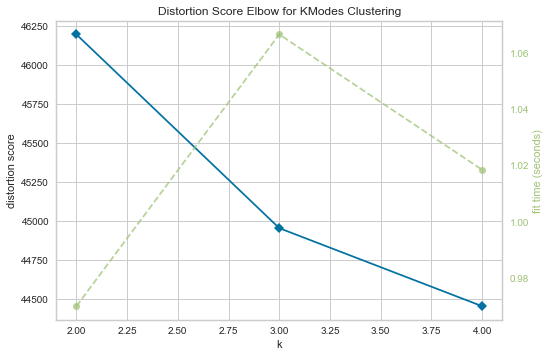

<AxesSubplot:title={'center':'Distortion Score Elbow for KModes Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
# Elbow Method for K modes to select optimal number of clusters
from yellowbrick.cluster import KElbowVisualizer
from kmodes.kmodes import KModes

model = KModes( init = 'Cao', n_init = 1, verbose=1)
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,5), timings= True)
visualizer.fit(df_for_cluster)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [56]:
# K-Modes with optimal number of clusters
km_cao = KModes(n_clusters=3, init = 'Cao', n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_scaled) # predict cluster

clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_scaled.columns
pd.options.display.max_columns = None

clusterCentroidsDf

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 414, cost: 31455.0
Run 1, iteration: 2/100, moves: 235, cost: 31428.0
Run 1, iteration: 3/100, moves: 14, cost: 31428.0


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,DaysCustomer,Kidhome,Teenhome,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response
0,-1.757704,-0.650341,-0.890110,-0.661229,-0.717858,-0.68365,-0.654251,-0.827573,-0.691929,-0.761660,-0.909241,-0.859220,0.277877,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,-0.601141,-1.503475,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.757704,-0.098170,-0.887145,-0.661229,-0.669343,-0.68365,-0.654251,-0.498939,-0.691929,-0.398846,-0.568778,-1.168047,0.688038,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,-0.768191,1.554001,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.646448,0.833617,-0.848596,-0.661229,-0.634060,-0.68365,-0.654251,-0.846905,-0.691929,-0.036032,-0.228315,-0.550393,-0.132284,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,-0.099992,-1.538051,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
# Combine df and predicted cluter to one df
pred_df = df_scaled.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([pred_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [63]:
combinedDf.head(5)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Age,DaysCustomer,Kidhome,Teenhome,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response,cluster_predicted
0,0.226491,0.315957,0.977994,1.551878,1.668188,2.456265,1.467037,0.854261,0.342532,1.415224,2.495392,-0.550393,0.688038,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,0.985832,1.534243,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
1,-0.235644,-0.374256,-0.872318,-0.636080,-0.713448,-0.647140,-0.630146,-0.730916,-0.174699,-1.124474,-0.568778,-1.168047,-0.132284,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,1.236407,-1.182415,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.754494,-0.788384,0.358258,0.571069,-0.179785,1.342691,-0.148035,-0.034985,-0.691929,1.415224,-0.228315,1.302571,-0.542445,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,0.317633,-0.199479,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,-1.007488,-0.788384,-0.872318,-0.560633,-0.651702,-0.501097,-0.581934,-0.750247,-0.174699,-0.761660,-0.909241,-0.550393,0.277877,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,-1.269340,-1.053992,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0.232565,1.558341,-0.391949,0.420175,-0.219479,0.156095,-0.003401,-0.556933,1.376993,0.326782,0.112149,0.067262,-0.132284,-0.28318,-0.287212,-0.279108,-0.264506,-0.11379,-0.099652,-1.018766,-0.945325,1,0,0,0,0,1,0,0,1,0,0,0,0,0,2


### Adjust Unbalanced Target Variable Values

In [68]:
# adjust unbalanced dataset using SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE()

X_b4_sampling = combinedDf[['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'DaysCustomer', 'Kidhome', 'Teenhome',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster_predicted']]
y_b4_sampling = combinedDf['Response']

X_upsampled, y_upsampled = smt.fit_sample(X_b4_sampling, y_b4_sampling)

### Feature Importance

In [89]:
# Feature importance, remove unimportant features
# Use Logistic Regression coefficients and p value to determine importance

import statsmodels.api as sm

#run logistic regression
logit_model = sm.Logit(y_upsampled,X_upsampled)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.293296
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Response   No. Observations:                 3444
Model:                          Logit   Df Residuals:                     3409
Method:                           MLE   Df Model:                           34
Date:                Tue, 27 Apr 2021   Pseudo R-squ.:                  0.5769
Time:                        23:22:59   Log-Likelihood:                -1010.1
converged:                       True   LL-Null:                       -2387.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Income                      0.0324      0.076      0.428      0.669      -0.116       0.181
Recency                    -1.2801      0.070    -18.241      0.000      -1.418      -1.143
MntWines                   -0.1532      0.104     -1.469      0.142      -0.358       0.051
MntFruits                  -0.0037      0.080     -0.047      0.963      -0.160       0.153
MntMeatProducts             0.8155      0.095      8.620      0.000       0.630       1.001
MntFishProducts            -0.2125      0.088     -2.410      0.016      -0.385      -0.040
MntSweetProducts            0.1508      0.081      1.865      0.062      -0.008       0.309
MntGoldProds                0.1197      0.072      1.670      0.095      -0.021       0.260
NumDealsPurchases           0.0058      0.072      0.081      0.936      -0.135       0.146
NumWebPurchases             0.3250      0.081      4.020      0.000       0.167       0.484
NumCatalogPurchases         0.4477      0.106      4.227      0.000       0.240       0.655
NumStorePurchases          -0.7159      0.093     -7.710      0.000      -0.898      -0.534
NumWebVisitsMonth           0.5819      0.100      5.808      0.000       0.386       0.778
AcceptedCmp3                0.5293      0.052     10.156      0.000       0.427       0.631
AcceptedCmp4                0.3510      0.063      5.574      0.000       0.228       0.474
AcceptedCmp5                0.5315      0.065      8.223      0.000       0.405       0.658
AcceptedCmp1                0.3843      0.061      6.346      0.000       0.266       0.503
AcceptedCmp2                0.2224      0.055      4.014      0.000       0.114       0.331
Complain                   -0.1472      0.088     -1.677      0.094      -0.319       0.025
Age                         0.1557      0.068      2.298      0.022       0.023       0.289
DaysCustomer                1.1587      0.076     15.316      0.000       1.010       1.307
Kidhome                     0.9885      0.152      6.505      0.000       0.691       1.286
Teenhome                   -0.7595      0.150     -5.070      0.000      -1.053      -0.466
Education_Basic            -3.5239      0.801     -4.398      0.000      -5.094      -1.953
Education_Graduation       -0.1235      0.140     -0.884      0.377      -0.397       0.150
Education_Master           -0.6353      0.206     -3.079      0.002      -1.040      -0.231
Education_PhD              -0.1596      0.206     -0.773      0.439      -0.564       0.245
Marital_Status_Alone       -1.6224      1.316     -1.232      0.218      -4.203       0.958
Marital_Status_Divorced    -1.8333      0.228     -8.043      0.000      -2.280      -1.387
Marital_Status_Married     -2.9090      0.175    -16.579      0.000      -3.253      -2.565
Marital_Status_Single      -1.1704      0.159     -7.362      0.000      -1.482      -0.859
Marital_Status_Together    -2.9234      0.190    -15.357      0.000      -3.297      -2.550
Marital_Status_Widow 

# Model Building

In [95]:
df_shuffled.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'DaysCustomer', 'Kidhome', 'Teenhome',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster_predicted', 'Response'],
      dtype='object')

In [98]:
# shuffle data before model

# put dataframe back together
combinedDf3 = pd.concat([X_upsampled, y_upsampled], axis = 1).reset_index()
combinedDf3 = combinedDf3.drop(['index'], axis = 1)

# shuffle data 
df_shuffled = combinedDf3.sample(frac = 1).reset_index()
df_shuffled = df_shuffled.drop(['index'], axis = 1)

# redefine train and target
X2 = df_shuffled[['Income', 'Recency', 'MntWines', 'MntMeatProducts','MntFruits',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Age', 'DaysCustomer', 'Kidhome', 'Teenhome',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'cluster_predicted']]

#removed for testing
#NumCatalogPurchases
#MntMeatProducts
#NumDealsPurchases
#MntFruits
y2 = df_shuffled['Response']


In [100]:
# Rerun model with new features and changes

X3 = X2
y3 = y2

# List all the models to be fitted
models_store = [LogisticRegression(random_state=0, max_iter=3000),
                SVC(gamma='auto'),
                SGDClassifier(max_iter=3000, tol=1e-3),
                KNeighborsClassifier(n_neighbors=3),
                DecisionTreeClassifier(random_state=0),
                MLPClassifier(random_state=1, max_iter=3000),
                GaussianNB()]

# String values of the models
models_names = ['LogisticRegression', 
                'SVC', 
                'SGD', 
                'KNNClassifer', 
                'DecisionTree', 
                'MLPClassifer',
                'GaussianNB']

#empty array to hold peformance of all model
acc_storage2 = []
prec_storage2 = []
recall_storage2 = []
f1_storage2 = []

#loop through all models and run each one according to the pipeline steps
for model in models_store:
    
    #performance metrics
    scores = cross_validate(model, X3, y3, cv = 4, scoring = ('accuracy', 'precision', 'recall', 'f1'))
    acc_avg_score = scores['test_accuracy'].mean()
    prec_avg_score = scores['test_precision'].mean()
    recall_avg_score = scores['test_recall'].mean()
    f1_avg_score = scores['test_f1'].mean()

    
    acc_performance = str(round(acc_avg_score,5)) + ' +/- ' + str(round((scores['test_accuracy'].max()-acc_avg_score),5))
    prec_performance = str(round(prec_avg_score,5)) + ' +/- ' + str(round((scores['test_precision'].max()-prec_avg_score),5))
    recall_performance = str(round(recall_avg_score,5)) + ' +/- ' + str(round((scores['test_recall'].max()-recall_avg_score),5))
    f1_performance = str(round(f1_avg_score,5)) + ' +/- ' + str(round((scores['test_f1'].max()-f1_avg_score),5))

    acc_storage2.append(acc_performance)
    prec_storage2.append(prec_performance)
    recall_storage2.append(recall_performance)
    f1_storage2.append(f1_performance)

#display performance 
df_metric = pd.DataFrame(data = {'Models' : models_names, 
                                 'accuracy' : acc_storage2,
                                 'precision' : prec_storage2,
                                 'recall' : recall_storage2,
                                 'f1': f1_storage2})

df_metric.sort_values(by = 'accuracy', ascending = False)

,Models,accuracy,precision,recall,f1
5,MLPClassifer,0.92654 +/- 0.00842,0.91762 +/- 0.01144,0.93728 +/- 0.00923,0.92733 +/- 0.00816
1,SVC,0.91463 +/- 0.00755,0.89846 +/- 0.01145,0.93497 +/- 0.01619,0.9163 +/- 0.00712
3,KNNClassifer,0.88328 +/- 0.00407,0.81429 +/- 0.00407,0.99304 +/- 0.00464,0.89482 +/- 0.00339
0,LogisticRegression,0.88095 +/- 0.00987,0.89453 +/- 0.01592,0.86412 +/- 0.0289,0.87887 +/- 0.01208
4,DecisionTree,0.86963 +/- 0.00958,0.85554 +/- 0.01543,0.88966 +/- 0.02217,0.87216 +/- 0.01099
2,SGD,0.86092 +/- 0.00552,0.87111 +/- 0.04488,0.85308 +/- 0.07018,0.85939 +/- 0.01218
6,GaussianNB,0.70819 +/- 0.04326,0.75887 +/- 0.10968,0.68003 +/- 0.25951,0.6901 +/- 0.04712


In [101]:
# note, without removal of columns from logistic equation is best so far

# Parameter Optimization

In [105]:
# Optimize Parameters of top performing model

# Intialize gridsearch
from sklearn.model_selection import GridSearchCV

tuning_parameters = [{'hidden_layer_sizes': [100, 300],
                      'activation': ['relu'],
                      'solver': ['adam'],
                      'alpha': [1e-4, 1e-5],
                      'max_iter': [3000],
                      'random_state': [1]}]

model = GridSearchCV(MLPClassifier(), tuning_parameters, scoring='accuracy',cv = 4)

model.fit(X3, y3)

# Display gridsearch
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_gridsearch = pd.DataFrame(model.cv_results_) 
df_gridsearch

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_random_state,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,7.832920,0.410734,0.004062,0.000072,relu,0.0001,100,3000,1,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.923345,0.934959,0.916376,0.931475,0.926539,0.007224,3
1,12.391495,0.627939,0.009148,0.001962,relu,0.0001,300,3000,1,adam,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.927991,0.925668,0.919861,0.939605,0.928281,0.007177,1
2,8.059412,0.598864,0.005278,0.001575,relu,0.00001,100,3000,1,adam,"{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.921022,0.931475,0.917538,0.933798,0.925958,0.006840,4
3,12.755327,0.398460,0.011234,0.001875,relu,0.00001,300,3000,1,adam,"{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.926829,0.926829,0.918699,0.940767,0.928281,0.007936,1


In [103]:
print('hi')

hi


# Performance Evaluation

### ROC Curve

AUC: 97.72 %


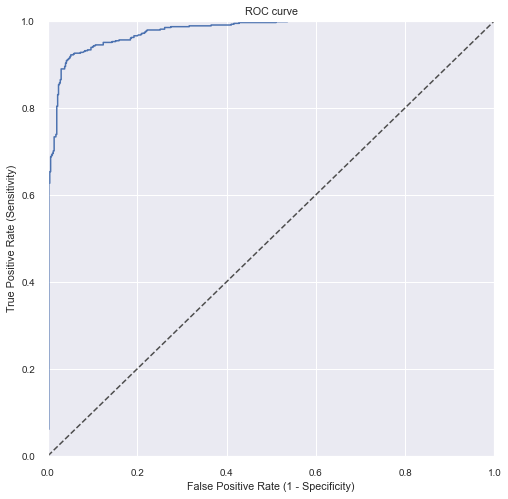

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

#split the data
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

#the model
model = MLPClassifier(random_state=1, max_iter=3000)
      
#fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]

#ROC graph x and y axis
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)
print('AUC:', round((auc(fpr, tpr))*100,2), '%')

#plot the ROC graph
fig, ax = plt.subplots(figsize = (8,8))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)